*Full project with complete code and datasets available on my Github [repository](https://github.com/ruthgn/Hotel-Booking-Cancellation-Prediction).*

Every year, there are more than 140 million bookings made on the internet. Most hotel bookings are placed via popular travel sites like Booking.com, Expedia.com, Hotels.com, etc. According to Google data, hotels are booked up to 12 weeks in advance.

Let's find the best model to predict hotel booking cancellations using tree-based algorithms based on the features found in the dataset. Our goal is to avoid overfitting and find the model that has the highest accuracy.

## 1. Getting Started

In [1]:
# Import all the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

You can download the full dataset on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand) or use the **hotel_bookings.csv** file in the project [repository](https://github.com/ruthgn/Hotel-Booking-Cancellation-Prediction).

In [2]:
# Import data
hotelData = pd.read_csv('hotel_bookings.csv')

In [3]:
# Take a quick look at the data
hotelData.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
# Get data summary
hotelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 2. Exploratory Data Analysis and Feature Engineering

We're going to visualize some features and assess their statistical relationship with our target variable. This analysis serves to help us detect errors and extreme values in the data, and, most importantly, gain deeper familiarity with the data.

Text(0, 0.5, 'Count')

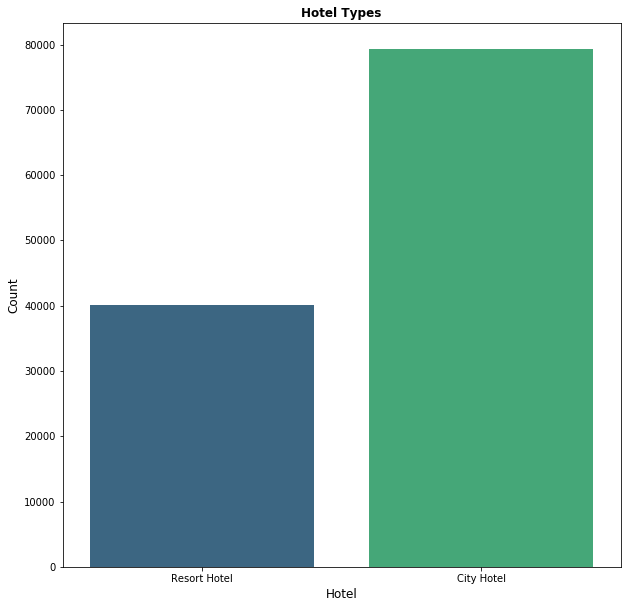

In [5]:
# Hotel types
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotelData, palette='viridis')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

According to the data, 34% of hotels booked were resort hotels while the rest of bookings were for city hotels.

Text(0, 0.5, 'Canceled vs Not Canceled')

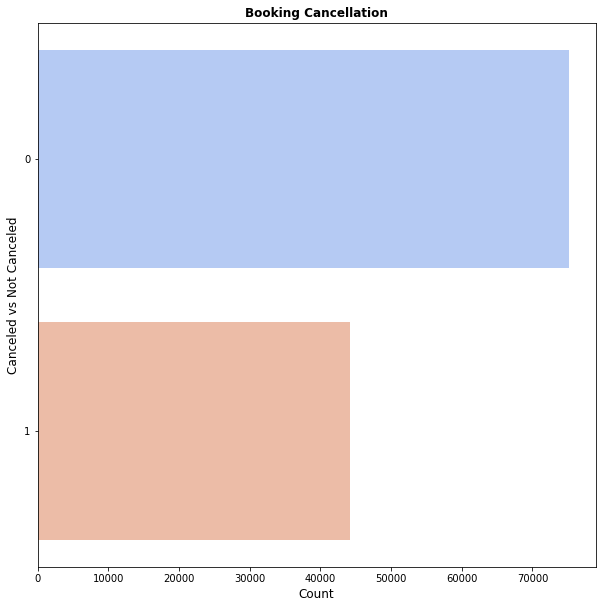

In [6]:
# Display booking cancellation 
plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= hotelData, palette='coolwarm', orient = 'v')
plt.title('Booking Cancellation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled vs Not Canceled', fontsize=12)

37% of hotel bookings were canceled.

Text(0, 0.5, 'Lead Time')

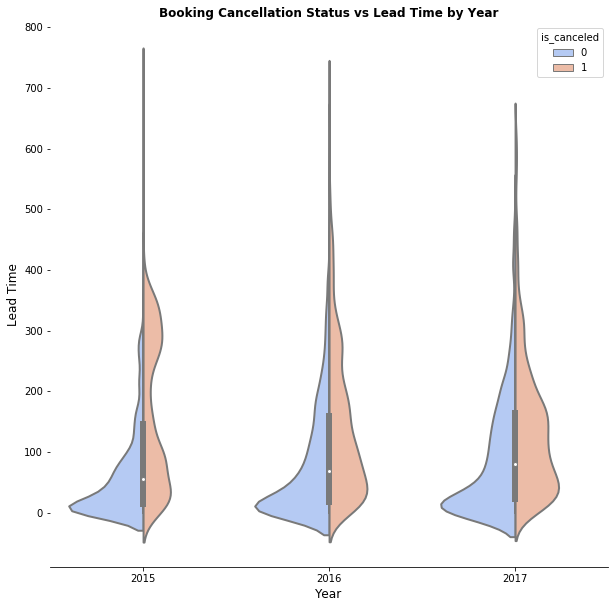

In [7]:
# Display each year's distribution of booking cancellation status vs lead_time
plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotelData, palette="coolwarm", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Booking Cancellation Status vs Lead Time by Year', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

Data from all three years shows that the distribution of `lead_time` among cancelled bookings varies each year although they have similar means and interquartile ranges. Meanwhile, the distribution of `lead_time` among bookings that were not cancelled looks similar throughout all three years.

Next, we will explore `arrival_date_month` column as a feature, but first we need to convert it to a format that's easier to work with.

In [8]:
# Convert `arrival_date_month` names to numbers
hotelData['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

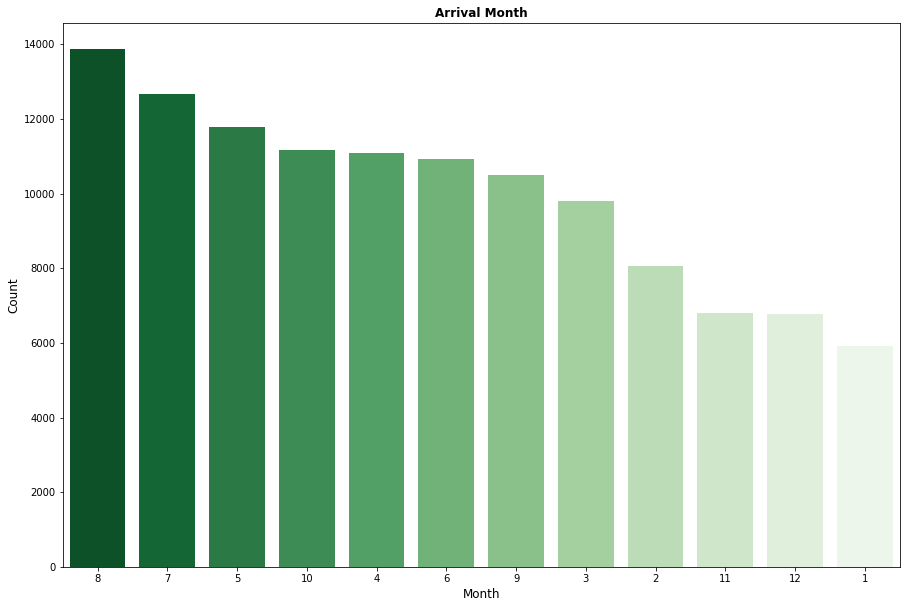

In [9]:
# Display arrival count by month 
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotelData,
              order=pd.value_counts(hotelData['arrival_date_month']).index, palette='Greens_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

Looking at the number of arrivals at hotels, August is the busiest month and January is the least occupied month.

Other time variables that could potentially be important features are `stays_in_week_nights` and `stays_in_weekend_night`.

In [10]:
# Display relationship between `stay_in_weekend` & `stay_in_week_nights` columns
pd.crosstab(index = hotelData['stays_in_week_nights'],columns=hotelData['stays_in_weekend_nights'], margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,715,4569,2361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7645
1,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30310
2,17956,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33684
3,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22258
4,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9563
5,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0,11077
6,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0,1499
7,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0,1029
8,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0,656


*Note*: 715 entries had input zero for both weekend and weeknights. However, this amount of missing data is small enough for us to ignore.

We'll create a new feature with labels`weekend_stay_only`,`weekday_stay_only`, and `weekday_and_weekend_stay`. The 715 entries with missing values will be labeled as undefined_data.

In [11]:
# Create new feature: 'weekend_or_weekday' 
pd.options.mode.chained_assignment = None
def weekendOrWeekday(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'weekend_only_stay'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'weekday_only_stay'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'weekday_and_weekend_stay'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
weekendOrWeekday(hotelData['stays_in_weekend_nights'],hotelData['stays_in_week_nights'], hotelData)

Next, we will check out the relationship between `arrival_date_month` and our newly-created feature `weekend_or_weekday`.

Text(0, 0.5, 'Bookings')

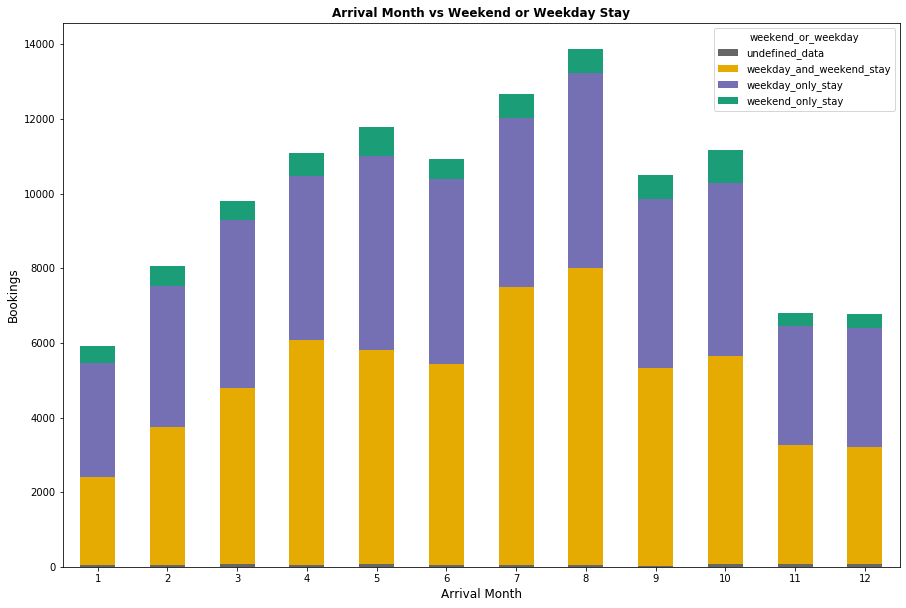

In [12]:
# Graph `arrival_date_month` vs `weekend_or_weekday` 
hotelData['arrival_date_month']= hotelData['arrival_date_month'].astype('int64')
groupData = hotelData.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
groupData.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Dark2_r',figsize=(15,10))
plt.title('Arrival Month vs Weekend or Weekday Stay', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Bookings', fontsize=12)

We learned that most bookings were made for `weekday_only_stay` or `weekday_and_weekend_stay`. The number of bookings made for `weekend_only_stay` is quite low compared to that of other categories.

Another feature we're going to create is a combination of information from `children` and `babies` columns. Let's call this feature `all_children`.

In [13]:
# Create new feature:`all_children`
hotelData['all_children'] = hotelData['children'] + hotelData['babies']
pd.crosstab(hotelData['adults'], hotelData['all_children'], margins=True, margins_name = 'Total').iloc[:10]

all_children,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


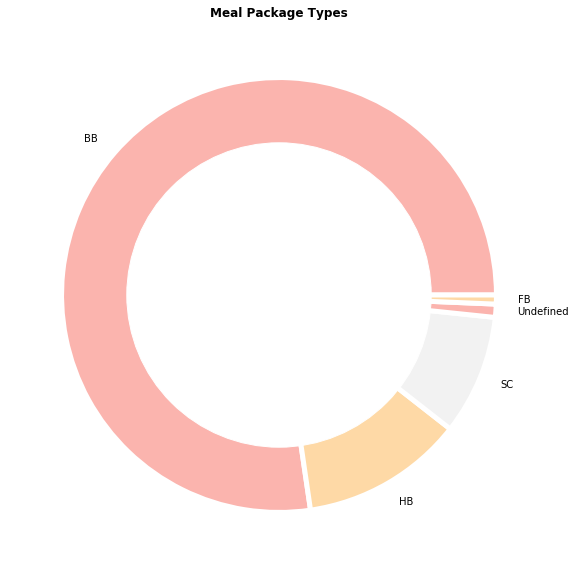

In [14]:
# Visualizing `meal` column data
mealLabels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = hotelData['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(3)*4)
myCircle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=mealLabels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(myCircle)
plt.title('Meal Package Types', weight='bold')
plt.show()

Almost 80% of bookings included `Bed&Breakfast` meal package.

In [15]:
# Use groupby to check out popular meal packages by hotel types
groupMealData = hotelData.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
groupMealData.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.67,0.06,0.44,0.99,0.00
Resort Hotel,0.33,0.94,0.56,0.01,1.00


We learned that 67% of bookings made for `City Hotel` included `Bed&Breakfast` meal package while 94% of `Resort Hotel` bookings included a `Full Board` meal package.

Let's check out the countries our hotel bookings originated from.

Text(0, 0.5, 'Bookings')

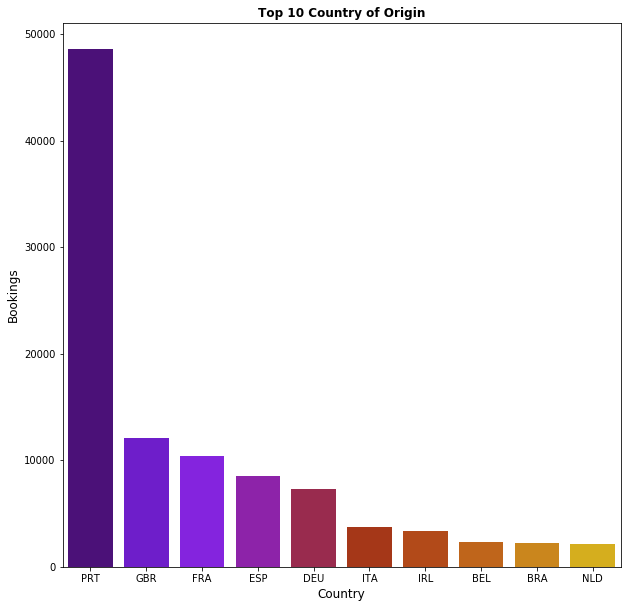

In [16]:
# Check out top 10 country of origin
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotelData, 
              order=pd.value_counts(hotelData['country']).iloc[:10].index, palette="gnuplot")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Bookings', fontsize=12)

Approximately 40% of all bookings were made from one country: Portugal.

Text(0, 0.5, 'Count')

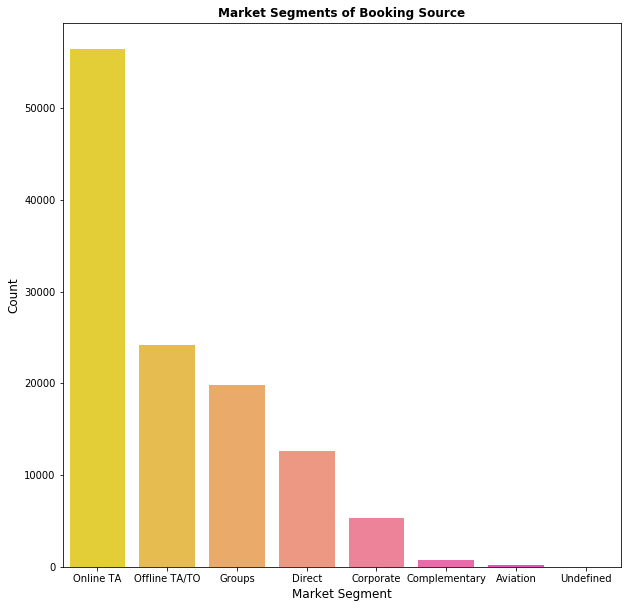

In [17]:
# Exploring `Market_segment` or booking source data
plt.figure(figsize=(10,10))
sns.countplot(hotelData['market_segment'], palette='spring_r', 
              order=pd.value_counts(hotelData['market_segment']).index)
plt.title('Market Segments of Booking Source', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

Statistics have shown that online hotel and airline reservations are becoming increasingly popular in recent years. Our data shows that most people completed their hotel reservations on a smartphone. More than 45% of bookings are made via `Online Travel Agents` while roughly 20% of bookings are made via `Offline Travel Agents`. Less than 20% of bookings were made directly by the customer.

Next, we're going to check if there were booking instances where the assigned room ended up being a different room from the one originally reserved.

In [18]:
# Reserved vs Assigned room 
pd.crosstab(index = hotelData['reserved_room_type'], 
            columns = hotelData['assigned_room_type'],normalize='index').round(2)*100

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,86.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,10.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,91.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0,0.0


*Note*: Every row represents the reserved room type and the distribution across the columns shows the type of room actually assigned.

Roughly 84% of bookings get to keep their reserved room while the remaining bookings require a room change.

We're also interested in looking into the relationship between ADR (Advanced Dining Reservations) and hotel booking cancellation status by month.

Text(0, 0.5, 'ADR')

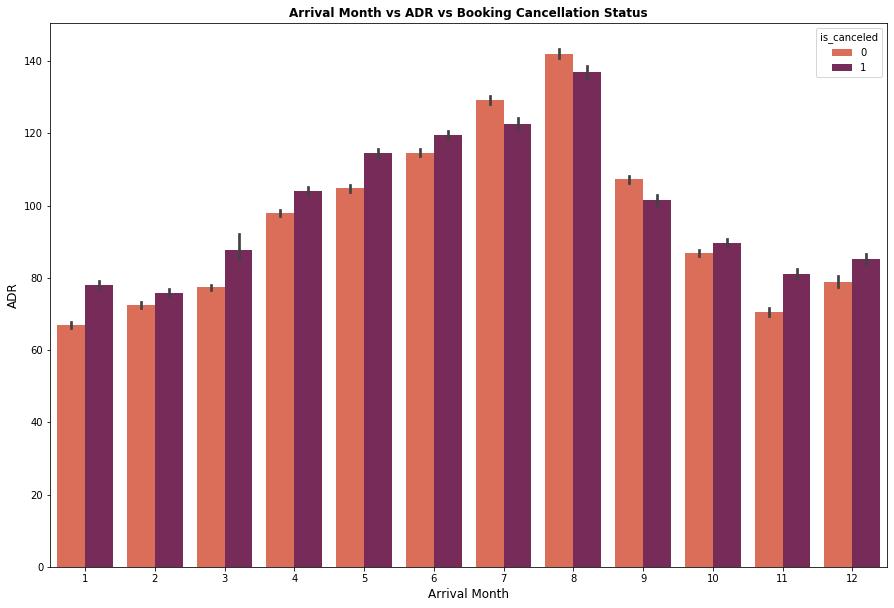

In [19]:
# Display `ADR` vs `Booking Cancellation Status` by month
hotelData['adr'] = hotelData['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'rocket_r', data=hotelData)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

As we figured out previously, August is the busiest month both in terms of number of arrivals. Additionaly, it is the busiest month in terms of the number of bookings made.

Notice that in the months of August, July and September (peak season for hotels), cancelled bookings have higher number of ADR than those that weren't cancelled.

Text(0, 0.5, 'Count')

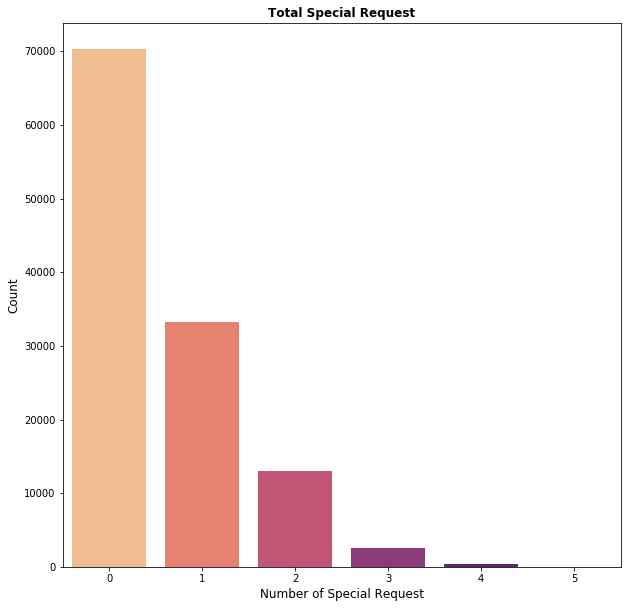

In [20]:
# Graph `total_of_special_requests` 
plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=hotelData, palette = 'magma_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Roughly 55% of hotel bookings do not come with any special requests.

Text(0, 0.5, 'Bookings')

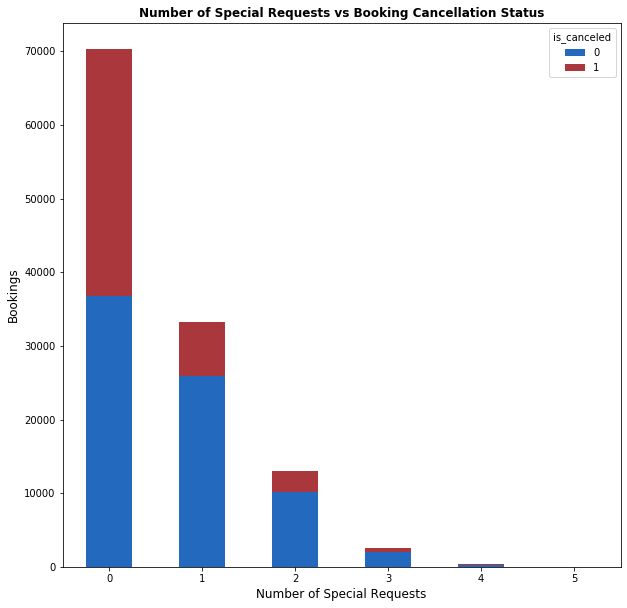

In [21]:
# Use groupby to see if number of special requests affects cancellation status
groupSpecRequest = hotelData.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
groupSpecRequest.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Number of Special Requests vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Requests', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Bookings', fontsize=12)

Very interesting! Almost half of all bookings made without any special request ended up being cancelled while bookings with more special requests are less likely to be cancelled.

## 3. Dealing with Missing Data and Correlation Matrix

Our next step is to check for any missing data.

In [22]:
# Display sum of null data
hotelData.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The `company` column is missing data on 94% of its rows. Therefore, we will be eliminating this variable. 

On the other hand, the `children` and `all_children` features have 4 missing data points. These null values will be replaced with zero. 

The `country` and `agent` features also have missing data. Since null values in `country` consist of only 1% of all the data in the column, we'll replace them with the most frequent value (mode). For the `agent` feature, missing data will be input as '0'.

In [23]:
# Fill in missing data
hotelData['children'] =  hotelData['children'].fillna(0)
hotelData['all_children'] = hotelData['all_children'].fillna(0)
hotelData['country'] = hotelData['country'].fillna(hotelData['country'].mode().index[0])
hotelData['agent']= hotelData['agent'].fillna('0')
hotelData=hotelData.drop(['company'], axis =1)

In [24]:
# Change data structure
hotelData['agent']= hotelData['agent'].astype(int)
hotelData['country']= hotelData['country'].astype(str)

Another task we need to do is analyze categorical features.

Categorical labels should be converted into a numeric format to make them more understandable and implementable for training machine learning algorithms. We can use [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for some non-ordinal features such as `country`, but due to the numerous categories, this method would incur a higher computational cost. Therefore, the [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method will be used instead.

In [25]:
# Use label encoder method for categorical features
labelencoder = LabelEncoder()
hotelData['hotel'] = labelencoder.fit_transform(hotelData['hotel'])
hotelData['arrival_date_month'] = labelencoder.fit_transform(hotelData['arrival_date_month'])
hotelData['meal'] = labelencoder.fit_transform(hotelData['meal'])
hotelData['country'] = labelencoder.fit_transform(hotelData['country'])
hotelData['market_segment']= labelencoder.fit_transform(hotelData['market_segment'])
hotelData['distribution_channel']=labelencoder.fit_transform(hotelData['distribution_channel'])
hotelData['is_repeated_guest'] = labelencoder.fit_transform(hotelData['is_repeated_guest'])
hotelData['reserved_room_type'] = labelencoder.fit_transform(hotelData['reserved_room_type'])
hotelData['assigned_room_type'] = labelencoder.fit_transform(hotelData['assigned_room_type'])
hotelData['deposit_type'] = labelencoder.fit_transform(hotelData['deposit_type'])
hotelData['agent'] = labelencoder.fit_transform(hotelData['agent'])
hotelData['customer_type'] = labelencoder.fit_transform(hotelData['customer_type'])
hotelData['reservation_status'] = labelencoder.fit_transform(hotelData['reservation_status'])
hotelData['weekend_or_weekday'] = labelencoder.fit_transform(hotelData['weekend_or_weekday'])

After encoding the categorical data, two DataFrames will be created. One DataFrame contains categorical data and the other one contains numerical data. We will use these two DataFrames to create a correlation matrix. We'll be computing the [Spearman coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) of the categorical data and [Pearson coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) of the numerical data.

In [26]:
# Create new DataFrame for categorical data
hotelDataCategorical = hotelData[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status', 
                                     'weekend_or_weekday']]
# Check DataFrame details
hotelDataCategorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119390 non-null  int32
 1   is_canceled           119390 non-null  int64
 2   arrival_date_month    119390 non-null  int64
 3   meal                  119390 non-null  int32
 4   country               119390 non-null  int32
 5   market_segment        119390 non-null  int32
 6   distribution_channel  119390 non-null  int32
 7   is_repeated_guest     119390 non-null  int64
 8   reserved_room_type    119390 non-null  int32
 9   assigned_room_type    119390 non-null  int32
 10  deposit_type          119390 non-null  int32
 11  agent                 119390 non-null  int64
 12  customer_type         119390 non-null  int32
 13  reservation_status    119390 non-null  int32
 14  weekend_or_weekday    119390 non-null  int32
dtypes: int32(11), int64(4)
memory usag

In [27]:
#Create new DataFrame for numerical data
hotelDataNumerical= hotelData.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status',
                                       'weekend_or_weekday'], axis = 1)
# Check DataFrame details
hotelDataNumerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  days_in_waiting_

Text(0.5, 1, 'Correlation Matrix-Spearman Method (Categorical Data)')

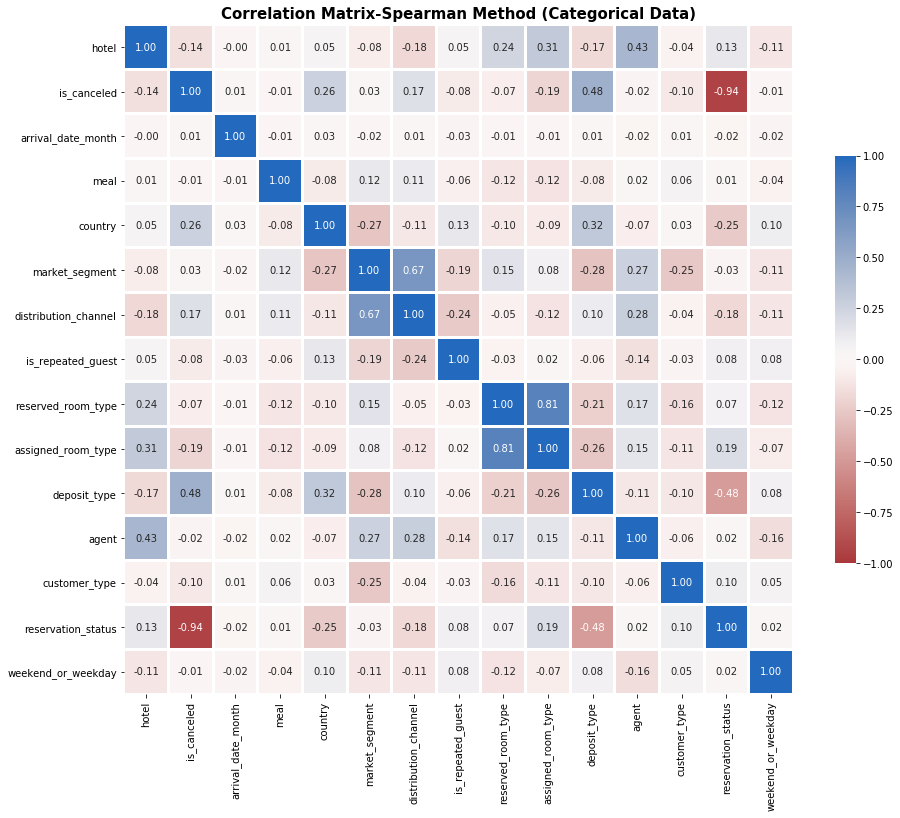

In [28]:
# Correlation matrix with Spearman method
plt.figure(figsize=(15,15))
corrCategorical=hotelDataCategorical.corr(method='spearman')
maskCategorical = np.triu(np.ones_like(corrCategorical, dtype=np.bool))
sns.heatmap(corrCategorical, annot=True, fmt=".2f", cmap='vlag_r', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix-Spearman Method (Categorical Data)",size=15, weight='bold')

We learned that `reservation_ status` as a feature has a negative correlation with hotel booking cancellation. However, we can see the relationship between the feature and target variable in detail below:

In [29]:
# Create table displaying `reservation_status` vs `is_canceled`
pd.crosstab(columns = hotelData['reservation_status'], index = hotelData['is_canceled'],
           margins=True, margins_name = 'Total')

reservation_status,0,1,2,Total
is_canceled,,,,
0,0,75166,0,75166
1,43017,0,1207,44224
Total,43017,75166,1207,119390


To prevent overfitting, `reservation_status` will be eliminated as a feature.

Text(0.5, 1, 'Correlation Matrix-Pearson Method (Numerical Data)')

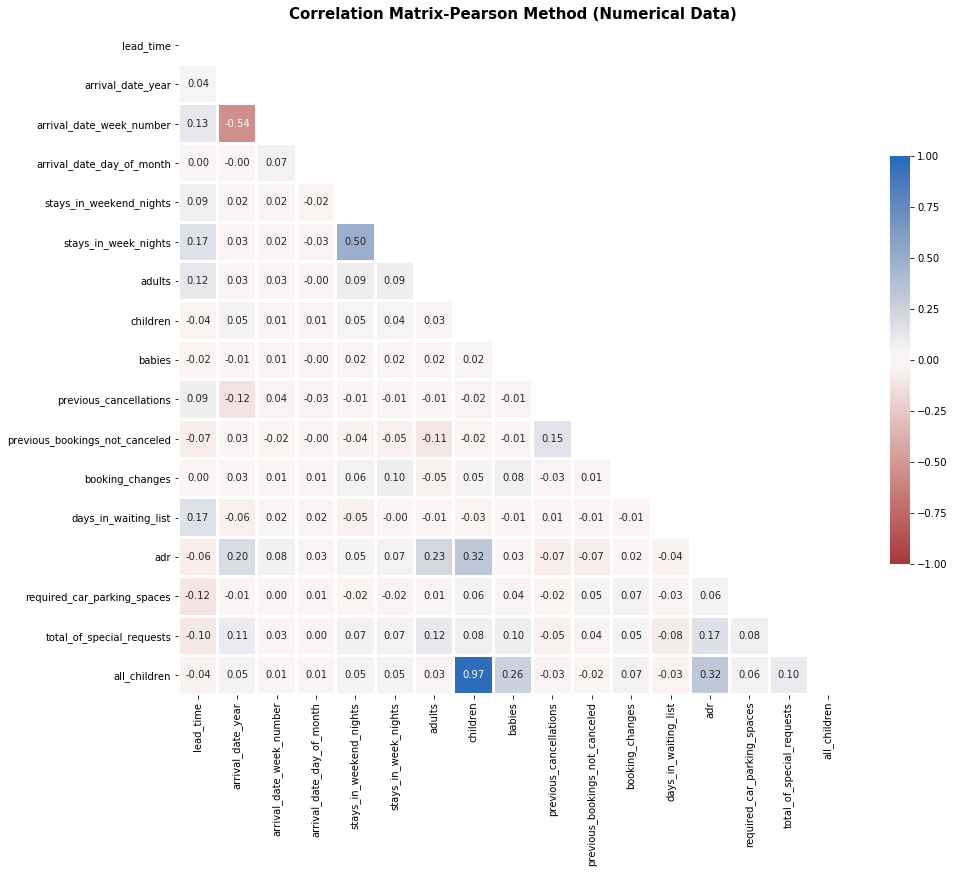

In [30]:
# Correlation matrix with Pearson method
plt.figure(figsize=(15,15))
corrNumerical=hotelDataNumerical.corr(method='pearson')
maskNumerical = np.triu(np.ones_like(corrNumerical, dtype=np.bool))
sns.heatmap(corrNumerical, annot=True, fmt=".2f", cmap='vlag_r', mask= maskNumerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix-Pearson Method (Numerical Data)",size=15, weight='bold')

In [31]:
# Finding highly correlated features
corrMaskCategorical = corrCategorical.mask(maskCategorical)
corrValuesCategorical = [c for c in corrMaskCategorical.columns if any (corrMaskCategorical[c] > 0.90)]
corrMaskNumerical = corrNumerical.mask(maskNumerical)
corrValuesNumerical = [c for c in corrMaskNumerical.columns if any (corrMaskNumerical[c] > 0.90)]
print(corrValuesCategorical, corrValuesNumerical)

[] ['children']


There is also high correlation between hotel booking cancellation and `children` & `all_children` features. Since the `all_children` feature is comprised of the `children` and `babies` features, we can remove `children` as a feature.

Additionally, we will also be removing `reservation_status_date` from our features since it contains date-type data that cannot be converted into a different type.

In [32]:
# Dropping some features from data
hotelData = hotelData.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

In [33]:
# Copying data for hyperparameter tuning and further analysis
hotelDataModel = hotelData

## 4. Hyperparameter Tunning and Calculating Feature Importance

Next, we will be searching for optimum hyperparameters for several tree-based machine learning algorithms with the help of a [grid search algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).  Hyperparameter tuning helps us create more accurate predictions. Therefore, we will set the values for our hyperparameters before our model training process.

Another important task to perform prior to training our model is to look at the [permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html) graph after using `Extreme Gradient Boosting` (XGBoost in short). A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each feature: Importance scores are calculated explicitly for each feature in the dataset, allowing features to be ranked and compared to each other.

In [34]:
# Seperate target variable
hotelDataTunning = hotelData
y = hotelDataTunning.iloc[:,1]
X = pd.concat([hotelDataTunning.iloc[:,0],hotelDataTunning.iloc[:,2:30]], axis=1)

In [35]:
## Finding parameters for XGBoost model

# model = XGBClassifier()
# parameters = {
# 'n_estimators' : [100,250,500],
# 'learning_rate' : [0.01, 0.1],
# 'subsample' :[0.5, 1.0],
# 'max_depth' : [3,5,7],
# 'criterion' : ['giny','entropy'],
# 'objective':['binary:logistic'],
# }

# grid_search = GridSearchCV(estimator=model, param_grid=parameters,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search.fit(X, y)
# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [36]:
## Finding parameters for RF model

# model_rfc_gs = RandomForestClassifier()
# parameters_rfc = {
# 'n_estimators' : [100,200,500],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,2,4,6]
# }

# grid_search_rfc = GridSearchCV(estimator=model_rfc_gs, param_grid=parameters_rfc,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search_rfc.fit(X, y)
# grid_search_rfc.best_params_

In [37]:
## Finding parameters for Extra Tree Classifier

# model_etc_gs = ExtraTreesClassifier()
# parameters_etc = {
# 'n_estimators' : [100,250,500],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,3,5,7]
# }

# grid_search_etc = GridSearchCV(estimator=model_etc_gs, param_grid=parameters_etc,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search_etc.fit(X, y)
# grid_search_etc.best_params_

In [38]:
## Finding parameters for Decision Tree

# model_dtc_gs = DecisionTreeClassifier()
# parameters_dtc = {
# 'criterion' : ['gini', 'entropy'],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,2,3,4,5],
# 'max_features' : ['auto', 'sqrt']
# }

# grid_search_dtc = GridSearchCV(estimator=model_dtc_gs, param_grid=parameters_dtc,
#                           cv=5, scoring='f1', verbose=True, n_jobs =-1)
# grid_search_dtc.fit(X, y)
# grid_search_dtc.best_params_

In [39]:
# Permutation Importance graph with XGB Classifier algorithm
params = {
    'criterion': 'giny', 
    'learning_rate': 0.01, 
    'max_depth': 5,
    'n_estimators': 100, 
    'objective': 'binary:logistic', 
}
model = XGBClassifier(parameters=params)
# fit the model
model.fit(X, y)
# perform permutation importance
result = permutation_importance(model, X, y, scoring='accuracy', n_repeats = 5, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

In [40]:
# Feature scores table
for i,v in enumerate(sortedIdx):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 9.00000
Feature: 1, Score: 27.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 28.00000
Feature: 4, Score: 14.00000
Feature: 5, Score: 22.00000
Feature: 6, Score: 13.00000
Feature: 7, Score: 8.00000
Feature: 8, Score: 6.00000
Feature: 9, Score: 10.00000
Feature: 10, Score: 3.00000
Feature: 11, Score: 7.00000
Feature: 12, Score: 16.00000
Feature: 13, Score: 5.00000
Feature: 14, Score: 19.00000
Feature: 15, Score: 4.00000
Feature: 16, Score: 24.00000
Feature: 17, Score: 25.00000
Feature: 18, Score: 23.00000
Feature: 19, Score: 2.00000
Feature: 20, Score: 15.00000
Feature: 21, Score: 12.00000
Feature: 22, Score: 18.00000
Feature: 23, Score: 17.00000
Feature: 24, Score: 26.00000
Feature: 25, Score: 21.00000
Feature: 26, Score: 20.00000
Feature: 27, Score: 1.00000
Feature: 28, Score: 11.00000


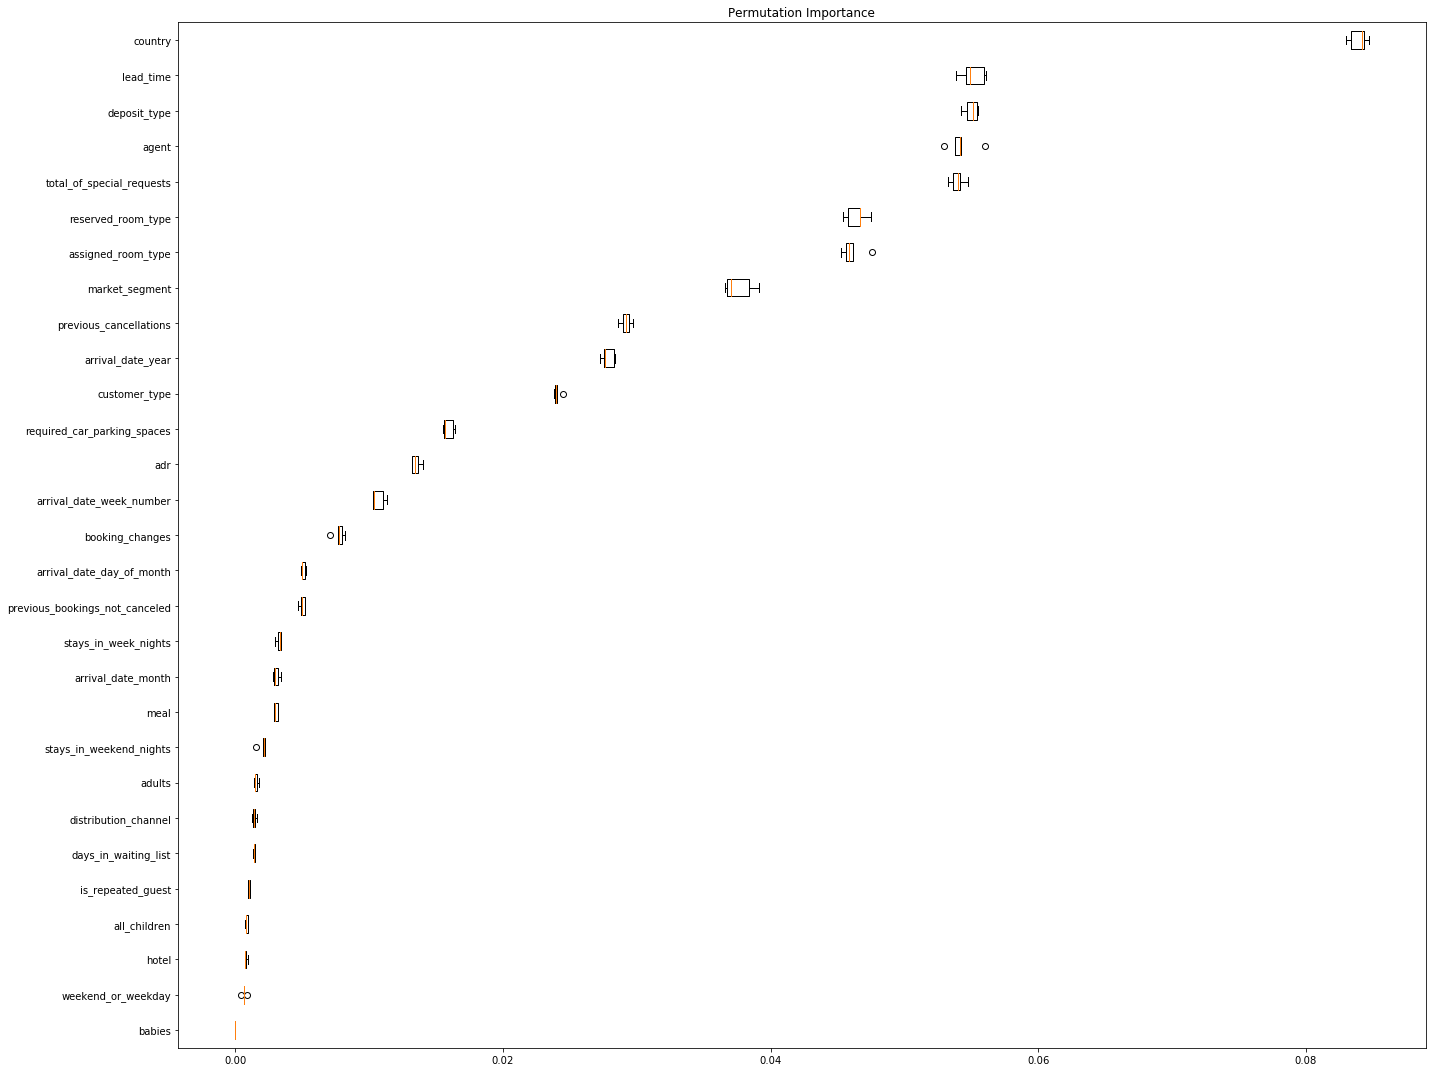

In [41]:
# Permutation Importance Graph 
fig, ax = plt.subplots(figsize=(20,15))

ax.boxplot(result.importances[sortedIdx].T,
           vert=False, labels=X.columns[sortedIdx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

The feature `babies` is deemed unimportant among the 29 features we will be using for our prediction, and therefore will be removed.

In [42]:
# Drop `baby` feature from data
hotel_data_model = hotel_data_model.drop(['babies'], axis=1)

## 5. Model Building

We will be building models using several tree-based algorithms: *Decision Tree*, *Random Forest*, *Extra Trees Classifier*, and *Extreme Gradient Boosting*. *Random Forest* and *Extra Tree Classification* algorithms have been chosen as bagging algorithms, `XGBoost` has been chosen as one of the boosting algorithms, while *Decision Tree* algorithm has been chosen as one tree algorithm.

Before we build our model, we will split our data into a training set and a test set (70% and 30%, respectively). `X_train` and `X_test` data will be standardized using *Standard Scaler*. After that, the [Stratified K-Fold Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) method will be used for resampling. Implementing cross-validation is important to avoid overfitting. Model parameters have been defined in a previous section.

In [43]:
# Seperate target variable for model building 
y_model = hotel_data_model.iloc[:,1]
X_model = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)
y_model.describe()

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

In [44]:
# Split to train and test with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42, stratify = y)

In [45]:
# Use standard scaler
standardScalerX = StandardScaler()
X_train = standardScalerX.fit_transform(X_train)
X_test = standardScalerX.fit_transform(X_test)

In [46]:
# Stratified K-Fold Cross Validation Method
kfold_cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X_model,y_model):
    X_train, X_test = X_model.iloc[train_index], X_model.iloc[test_index]
    y_train, y_test = y_model.iloc[train_index], y_model.iloc[test_index]

In [47]:
# Decision Tree Model Building
dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4, max_features = 'auto')
# Fit the model
dtc_model.fit(X_train, y_train)

# Model prediction
predict_dtc = dtc_model.predict(X_test)

In [48]:
# Random Forest Model Building
rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)
# Fit the model
estimator= rf_model.fit(X_train, y_train)
# Model prediction
predict_rf = rf_model.predict(X_test)

In [49]:
# Extra Treees Classsifier Model Building
etc_model = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split=2,
                                  n_estimators = 100)
# Fit the model
etc_model.fit(X_train, y_train)

# Model prediction
predict_etc = etc_model.predict(X_test)

In [50]:
# Extreme Gradient Boosting Model Building
xgb_model = XGBClassifier(criterion = 'giny', learning_rate = 0.01, max_depth = 5, n_estimators = 100,
                          objective ='binary:logistic', subsample = 1.0)
# Fit the model
xgb_model.fit(X_train, y_train)
# Model prediction
predict_xgb = xgb_model.predict(X_test)

## 6. Model Evaluation

The last part is comparison of classification reports of ML models.

In [51]:
# Print classification reports 
print("RF", classification_report(y_test, predict_rf))
print("DTC",classification_report(y_test, predict_dtc))
print("ETC", classification_report(y_test, predict_etc))
print("XGB", classification_report(y_test, predict_xgb))

RF               precision    recall  f1-score   support

           0       0.88      0.94      0.91     15033
           1       0.88      0.79      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

DTC               precision    recall  f1-score   support

           0       0.87      0.89      0.88     15033
           1       0.81      0.77      0.79      8845

    accuracy                           0.85     23878
   macro avg       0.84      0.83      0.83     23878
weighted avg       0.85      0.85      0.85     23878

ETC               precision    recall  f1-score   support

           0       0.85      0.95      0.90     15033
           1       0.90      0.72      0.80      8845

    accuracy                           0.87     23878
   macro avg       0.88      0.84      0.85     23878
weighted avg       0.87      0.87      0.86     23878

XGB     

Text(570.5454545454544, 0.5, 'Actual Labels')

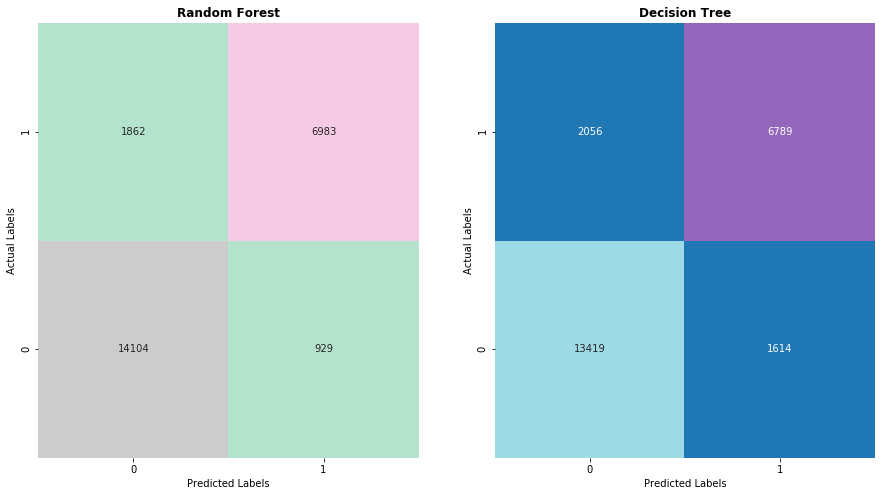

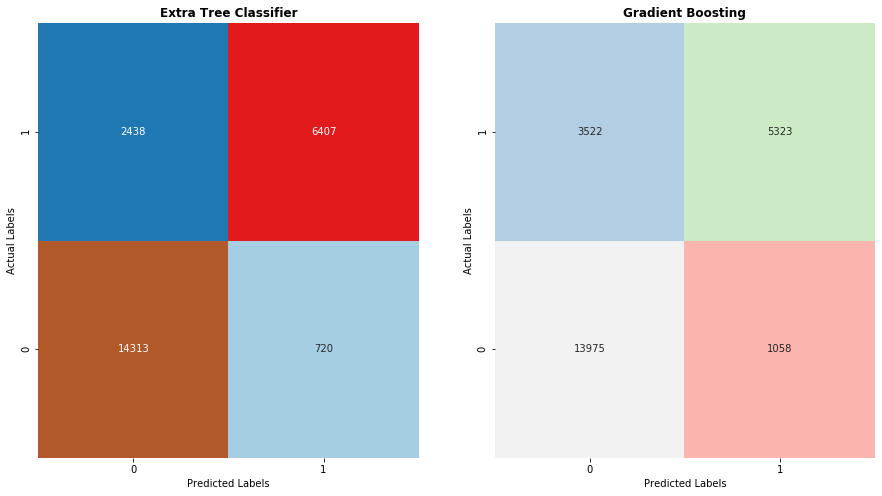

In [52]:
# Confusion matrix 
DTC_matrix = confusion_matrix(y_test, predict_dtc)
RF_matrix = confusion_matrix(y_test, predict_rf)
ETC_matrix = confusion_matrix(y_test, predict_etc)
XGB_matrix = confusion_matrix(y_test, predict_xgb) 

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(RF_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([0,2])
ax[0].set_title("Random Forest", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
sns.heatmap(DTC_matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20", ax = ax[1]).set_ylim([0,2])
ax[1].set_title("Decision Tree", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')

fig, axe = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(ETC_matrix,annot=True, fmt="d", cbar=False, cmap="Paired", ax = axe[0]).set_ylim([0,2])
axe[0].set_title("Extra Tree Classifier", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
sns.heatmap(XGB_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel1", ax = axe[1]).set_ylim([0,2])
axe[1].set_title("Gradient Boosting", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')

Let's first compare the *accuracy* of the results.

* Accuracy is a ratio of correct predictions to the total predictions.  
Its formula is $(TP+TN) / (TP+FP+FN+TN)$

Our *Random Forest* model has the highest accuracy with a correct prediction rate of 88%. 

Now let's look at other important performance metrics, namely *precision* and *recall*.

* Precision is the ratio of correctly predicted observation to the total positive predicted observation. 
Its formula is $TP / (TP+FP)$
* Recall is the ratio of correctly predicted positive observations to the actual positive observations.
Its formula is $TP / (TP+FN)$

Our *Random Forest* and *Extra Tree Classifier* models share the highest precision ratios. It means that both models predicted around 88% of all the positive labels correctly. On the other hand, the *Random Forest* model also has a high recall ratio, correctly predicting 79% of positive observations correctly. In conclusion, our *Random Forest* model gives us the best prediction for hotel booking cancellations.